# 1. 포켓몬 149종 분류
* Train: https://www.kaggle.com/datasets/thedagger/pokemon-generation-one
* Validation: https://www.kaggle.com/hlrhegemony/pokemon-image-dataset

In [ ]:
import os

In [ ]:
os.environ['KAGGLE_USERNAME'] = 'koduri135'
os.environ['KAGGLE_KEY'] = 'f21f542a22adb7f43c15dc144f512c7a'

In [ ]:
# Train
!kaggle datasets download -d thedagger/pokemon-generation-one
!unzip -q pokemon-generation-one.zip

pokemon-generation-one.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# Validation
!kaggle datasets download -d hlrhegemony/pokemon-image-dataset
!unzip -q pokemon-image-dataset.zip

pokemon-image-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# 디렉토리 이름 변경
# train, validation 으로 이름 변경
!mv dataset train

In [ ]:
!rm -rf train/dataset

In [ ]:
!mv images validation

In [ ]:
import os

In [ ]:
train_labels = os.listdir('train')
len(train_labels)

149

In [ ]:
val_labels = os.listdir('validation')
len(val_labels)

150

In [ ]:
import shutil

In [ ]:
# train: 149, validation: 898의 종류를 가지고 있음
# validation에서 train에 있는 디렉토리를 확인하여 없는 디렉토리는 제거

for val_label in val_labels:
    if val_label not in train_labels:
        shutil.rmtree(os.path.join('validation', val_label))

val_labels = os.listdir('validation')
len(val_labels)

149

In [ ]:
for train_label in train_labels:
    if train_label not in val_labels:
        print(train_label)
        os.makedirs(os.path.join('validation', train_label), exist_ok=True)

val_labels = os.listdir('validation')
print(len(val_labels))

149


In [ ]:
# 새로 만든 폴더에 이미지 채우기
!wget -q https://www.drawingtutorials101.com/drawing-tutorials/Anime-and-Manga/Pokemon/farfetch-d/how-to-draw-Farfetchd-from-Pokemon-step-0.png

In [ ]:
!wget -q https://files.slack.com/files-tmb/T026S7PEVA7-F05DG7UHBFC-29f8bdad44/mr.-mime-pokemon-png-free-download_720.png

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import datasets, models, transforms
from torch.nn import functional as F
from torch.utils.data import DataLoader

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [ ]:
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomAffine(0, shear=10, scale=(0.8, 1.2)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor()
    ]),
    'validation': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor()
    ])
}

image_datasets = {
    'train': datasets.ImageFolder('train', data_transforms['train']),
    'validation': datasets.ImageFolder('validation', data_transforms['validation'])
}

dataloaders = {
    'train': DataLoader(
        image_datasets['train'],
        batch_size=32,
        shuffle=True
    ),
    'validation': DataLoader(
        image_datasets['validation'],
        batch_size=32,
        shuffle=False
    )
}

print(len(image_datasets['train']), len(image_datasets['validation']))

10657 661


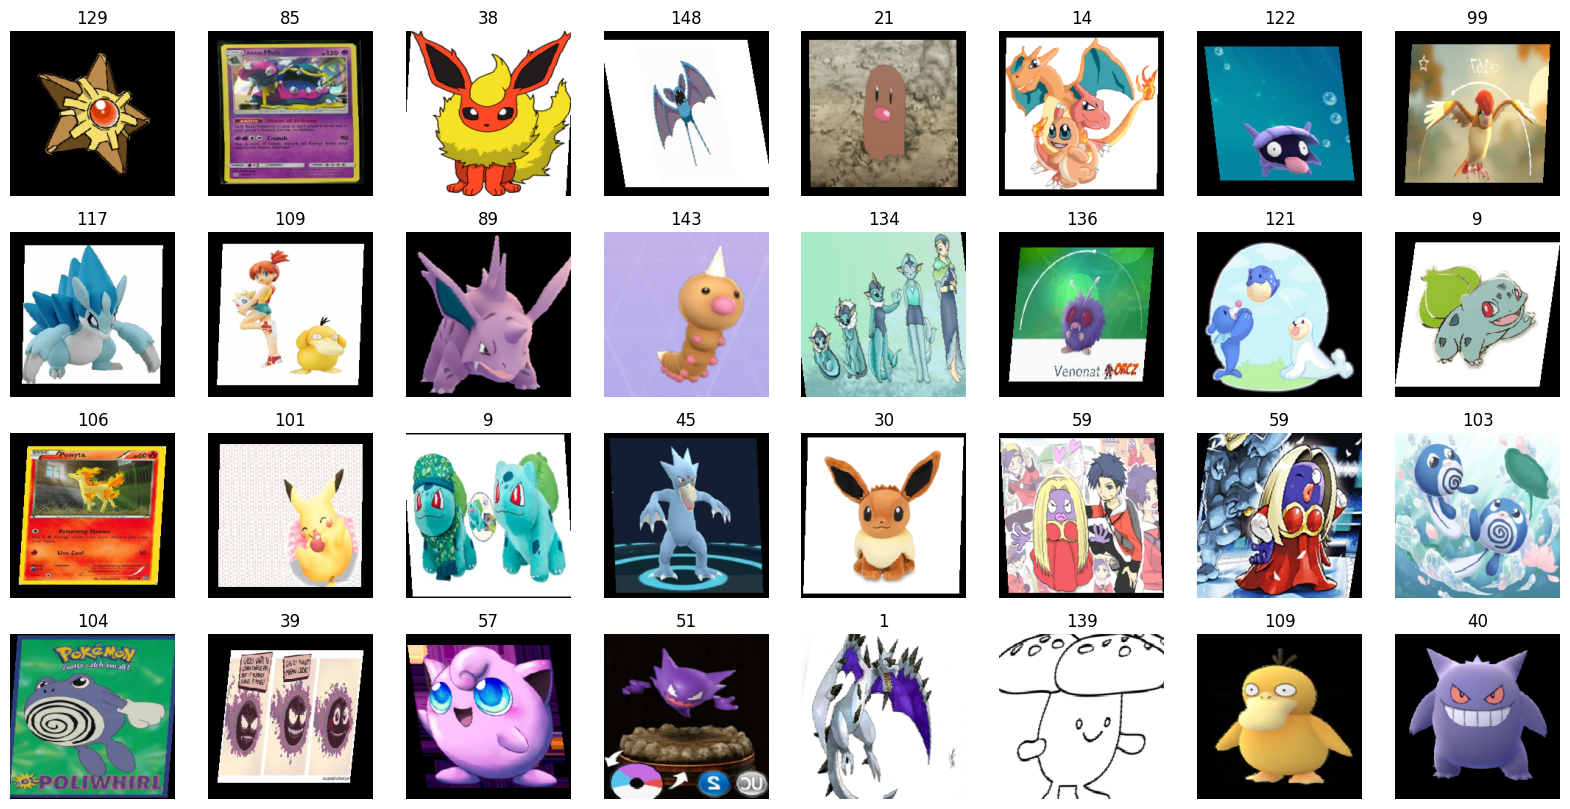

In [ ]:
imgs, labels = next(iter(dataloaders['train']))

fig, axes = plt.subplots(4, 8, figsize=(20, 10))

for img, label, ax in zip(imgs, labels, axes.flatten()):
    ax.set_title(label.item())
    ax.imshow(img.permute(1, 2, 0))
    ax.axis('off')

In [ ]:
# 클래스 이름 확인하기
# 전체 image_datasets['train'].classes[]
image_datasets['train'].classes[81]

'Mew'

In [ ]:
# 사전 학습된 EfficientNetB4 모델
model = models.efficientnet_b4(weights='IMAGENET1K_V1').to(device)
print(model)

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=48, bias=False)
            (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(48, 12, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(12, 48, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActiv

In [ ]:
# 파라미터는 수정하지 않고 fc 모델만 수정(output이 149)
for param in model.parameters():
  param.requires_gred = False


model.classifier = nn.Sequential(
    nn.Linear(1792, 512),
    nn.ReLU(),
    nn.Linear(512, 149),
).to(device)

print(model)

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=48, bias=False)
            (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(48, 12, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(12, 48, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActiv

In [ ]:
# 학습
optimizer = optim.Adam(model.classifier.parameters(), lr=0.001)
epochs = 5
for epoch in range(epochs):
    for phase in ['train', 'validation']:
        if phase == 'train':
            model.train()
        else:
            model.eval()
        sum_losses = 0
        sum_accs = 0
        for x_batch, y_batch in dataloaders[phase]:
            x_batch = x_batch.to(device)
            y_batch = y_batch.to(device)
            y_pred = model(x_batch)
            loss = nn.CrossEntropyLoss()(y_pred, y_batch)

            if phase == 'train':
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
            sum_losses = sum_losses + loss.item()
            y_prob = nn.Softmax(1)(y_pred)
            y_pred_index = torch.argmax(y_prob, axis=1)

            acc = (y_batch == y_pred_index).float().sum() / len(y_batch) * 100

            sum_accs = sum_accs + acc.item()
        avg_loss = sum_losses / len(dataloaders[phase])
        avg_acc = sum_accs / len(dataloaders[phase])

        print(f'{phase:10s}: Epoch {epoch+1:4d}/{epochs}, Loss: {avg_loss:.4f}, Accuracy: {avg_acc:.2f}%')

OutOfMemoryError: ignored

In [ ]:
# 학습된 모델 파일 저장
torch.save(model.state_dict(),'pokemon.h5')

In [ ]:
# 테스트(validation에 있는 2종의 포켓몬을 통해 분류테스트)
model = models.efficientnet_b4().to(device)

model.classifier = nn.Sequential(
   nn.Linear(1792, 512),
    nn.ReLU(),
    nn.Linear(512, 149),
).to(device)

OutOfMemoryError: ignored

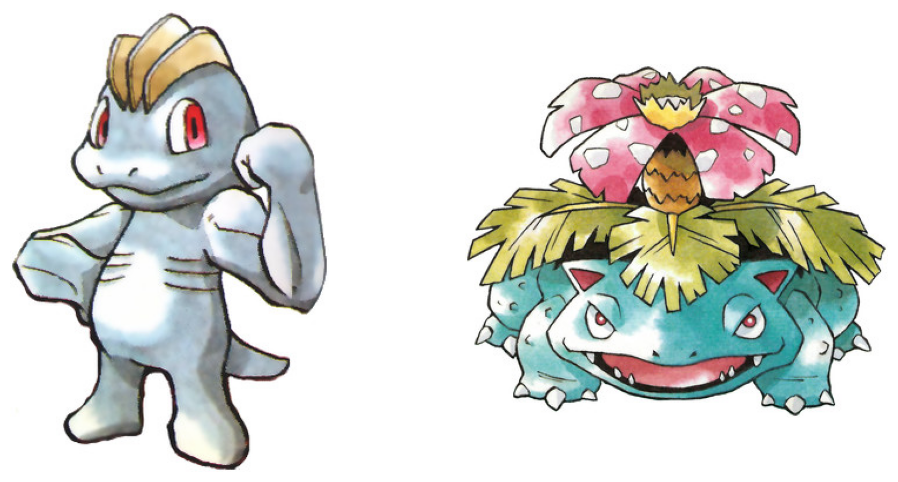

In [ ]:
from PIL import Image

img1 = Image.open('/content/validation/Machop/2.jpg')
img2 = Image.open('/content/validation/Venusaur/4.jpg')

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(img1)
axes[0].axis('off')
axes[1].imshow(img2)
axes[1].axis('off')
plt.show()

In [ ]:
img1_input = data_transforms['validation'](img1)
img2_input = data_transforms['validation'](img2)

print(img1_input.shape)
print(img2_input.shape)

torch.Size([3, 224, 224])
torch.Size([3, 224, 224])


In [ ]:
torch_batch = torch.stack([img1_input, img2_input])
test_batch = test_batch.to(device)
test_batch.shape()

TypeError: ignored

In [ ]:
y_pred = model(test_batch)
y_pred

In [ ]:
y_prob = nn.Softmax(1)(y_pred)
y_prob

In [ ]:
probs, indices = torch.topk(y_prob, k=3, axis=-1)
probs = probs.cpu().data.numpy()
indices = indices.cpu().data.numpy()
print(probs)
print(indices)

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].set_title('{:.2f}% {}, {:.2f}% {}, {:.2f}% {}'.format(
    probs[0, 0] * 100, image_datasets['validation'].classes[indices[0, 0]],
    probs[0, 1] * 100, image_datasets['validation'].classes[indices[0, 1]],
    probs[0, 2] * 100, image_datasets['validation'].classes[indices[0, 2]]
))
axes[0].imshow(img1)
axes[0].axis('off')
axes[1].set_title('{:.2f}% {}, {:.2f}% {}, {:.2f}% {}'.format(
    probs[1, 0] * 100, image_datasets['validation'].classes[indices[1, 0]],
    probs[1, 1] * 100, image_datasets['validation'].classes[indices[1, 1]],
    probs[1, 2] * 100, image_datasets['validation'].classes[indices[1, 2]]
))
axes[1].imshow(img2)
axes[1].axis('off')
plt.show()